<a href="https://colab.research.google.com/github/gontam/mmesum22/blob/toshevskamarija/A3_Toshevska_Marija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Project done by students: Cristina Soriano, Oliver Jovanovic, Marija Toshevska

In [ ]:
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd
import numpy as np
from random import sample
# from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
reader = pd.read_csv('/content/drive/MyDrive/input.csv', header=None, delimiter=';')

In [8]:
#change commas by dots
reader[0]=reader[0].str.replace(',','.')
reader[1]=reader[1].str.replace(',','.')

In [9]:
reader[0] = pd.to_numeric(reader[0], downcast="float")
reader[1] = pd.to_numeric(reader[1], downcast="float")

In [ ]:
reader

,0,1
0,3.000000,NaN
1,18.000000,2.000000
2,0.348265,0.269012
3,0.234727,0.757320
4,0.767185,0.721171
5,0.716671,0.867751
6,0.919303,0.573783
7,0.344657,0.165592
8,0.456946,0.939763
9,0.276024,0.150340


In [10]:
import random

In [11]:
data=reader.iloc[2:len(reader)]
print(data)

           0         1
2   0.348265  0.269012
3   0.234727  0.757320
4   0.767185  0.721171
5   0.716671  0.867751
6   0.919303  0.573783
7   0.344657  0.165592
8   0.456946  0.939763
9   0.276024  0.150340
10  0.562195  0.473443
11  0.235105  0.325537
12  0.903213  0.004043
13  0.563296  0.704395
14  0.464132  0.815031
15  0.781521  0.327890
16  0.029144  0.158528
17  0.834918  0.404196
18  0.050048  0.453950
19  0.621989  0.059894


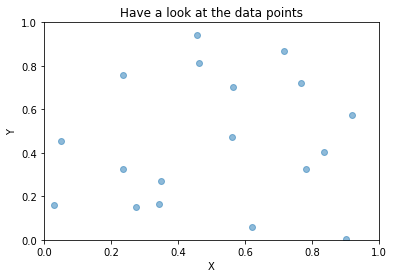

In [12]:
# Plot the points:
plt.scatter(data[0], data[1], alpha=.5)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Have a look at the data points')
plt.show()

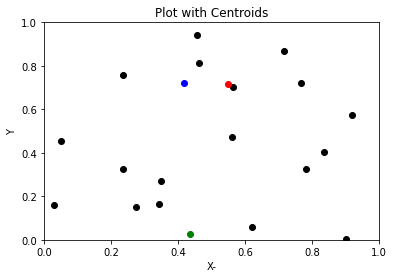

In [13]:
#Implementing it from scratch:

# Step 1: Select value of K:
n_cluster=reader[0][0]
n_cluster=int(n_cluster)


# Step 2: Select random K points which will act as centroids.
i=0
centroids=[]

while i<n_cluster:
  np.random.seed(i)
  array=np.random.rand(2)
  centroids.append(array)
  i=i+1 

# Plot normal data and random centroids:
plt.scatter(data[0], data[1], c='black')
plt.scatter(centroids[0][0],centroids[0][1], c='red')
plt.scatter(centroids[1][0],centroids[1][1], c='blue')
plt.scatter(centroids[2][0],centroids[2][1], c='green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('X-')
plt.ylabel('Y')
plt.title('Plot with Centroids')

plt.show()

In [14]:
# Implement KMeans:
# Calculate distances:
x = 0
a = np.empty([1, 2])
#data_lenght
data_length=data.shape[0]
dist=[]
tmp = np.empty([data_length, n_cluster])
x = 0
distances=[]
while x <= data_length - 1:
  point=np.matrix(data.iloc[x],dtype='float64')
  dist1=cdist(np.matrix(centroids[0]),point,metric='cityblock')
  dist2=cdist(np.matrix(centroids[1]),point,metric='cityblock')
  dist3=cdist(np.matrix(centroids[2]),point,metric='cityblock')
  dist.append(dist1)
  dist.append(dist2)
  dist.append(dist3)
  distances.append(dist)
  dist=[]
  x=x+1


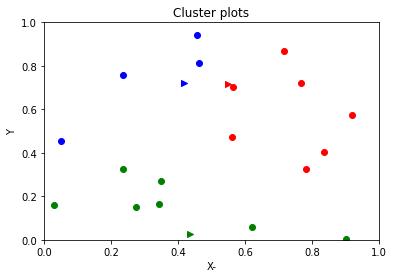

In [15]:
clusters=[]
for i in range(0,len(distances)):
  clusters.append(distances[i].index(min(distances[i])))

# Plot clusters:
for i in range(0,len(clusters)):
  if clusters[i]==0:
    plt.scatter(data[0][i+2],data[1][i+2],c='red')
  elif clusters[i]==1:
    plt.scatter(data[0][i+2],data[1][i+2],c='blue')
  elif clusters[i]==2:
    plt.scatter(data[0][i+2],data[1][i+2],c='green')
plt.scatter(centroids[0][0],centroids[0][1], c='red',marker='>')
plt.scatter(centroids[1][0],centroids[1][1], c='blue',marker='>')
plt.scatter(centroids[2][0],centroids[2][1], c='green',marker='>')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('X-')
plt.ylabel('Y')
plt.title('Cluster plots')

plt.show()

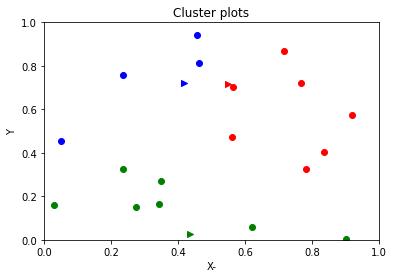

0.6722602665956532


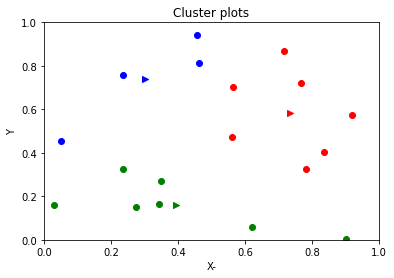

0.6722602665956532


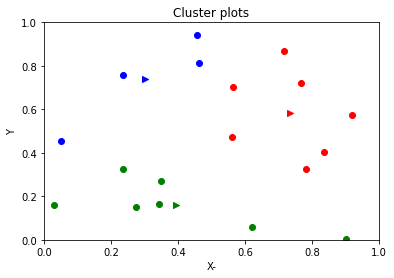

0.6722602665956532


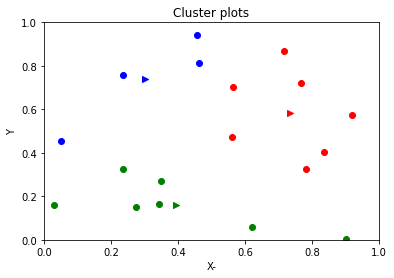

0.6722602665956532


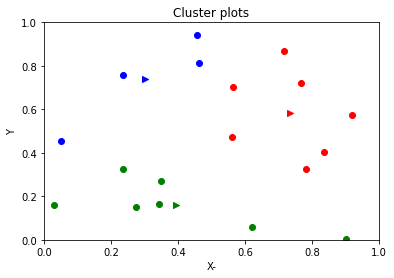

0.6722602665956532


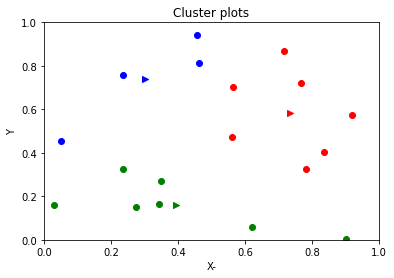

0.6722602665956532


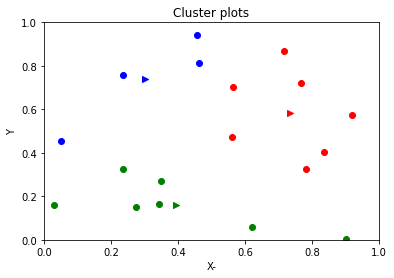

0.6722602665956532


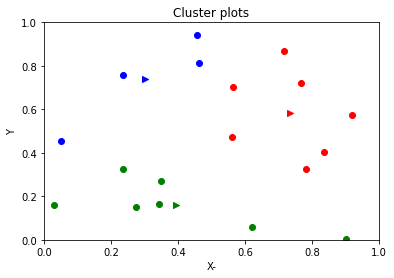

0.6722602665956532


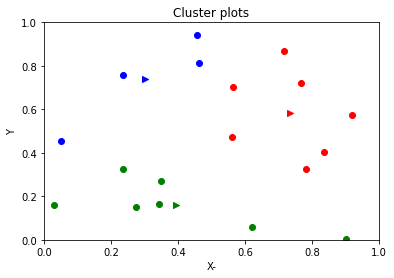

0.6722602665956532


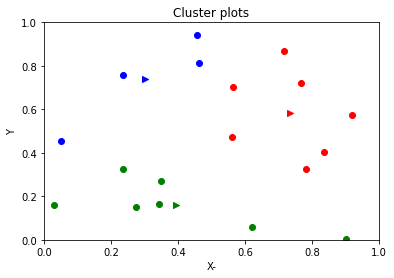

0.6722602665956532


In [16]:
maxerror=10
iteration=0
while maxerror>0.5 and iteration<10:
  clusters=[]
  for i in range(0,len(distances)):
    clusters.append(distances[i].index(min(distances[i])))

  # Plot clusters:
  for i in range(0,len(clusters)):
    if clusters[i]==0:
      plt.scatter(data[0][i+2],data[1][i+2],c='red')
    elif clusters[i]==1:
      plt.scatter(data[0][i+2],data[1][i+2],c='blue')
    elif clusters[i]==2:
      plt.scatter(data[0][i+2],data[1][i+2],c='green')
  plt.scatter(centroids[0][0],centroids[0][1], c='red',marker='>')
  plt.scatter(centroids[1][0],centroids[1][1], c='blue',marker='>')
  plt.scatter(centroids[2][0],centroids[2][1], c='green',marker='>')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.xlabel('X-')
  plt.ylabel('Y')
  plt.title('Cluster plots')

  plt.show()

  #recalculate centroids
  aux_01=0
  aux_11=0
  aux_02=0
  aux_12=0
  aux_03=0
  aux_13=0
  n_1=0
  n_2=0
  n_3=0
  for i in range(0,len(clusters)):
    if clusters[i]==0:
      aux_01=data[0][i+2]+aux_01
      aux_11=data[1][i+2]+aux_11
      n_1=n_1+1
    elif clusters[i]==1:
      aux_02=data[0][i+2]+aux_02
      aux_12=data[1][i+2]+aux_12
      n_2=n_2+1
    elif clusters[i]==2:
      aux_03=data[0][i+2]+aux_03
      aux_13=data[1][i+2]+aux_13
      n_3=n_3+1
  oldcentroids=centroids
  centroids[0][0]=aux_01/n_1
  centroids[0][1]=aux_11/n_1
  centroids[1][0]=aux_02/n_2
  centroids[1][1]=aux_12/n_2
  centroids[2][0]=aux_03/n_3
  centroids[2][1]=aux_13/n_3
  errortotal=cdist(np.matrix(centroids),np.matrix(oldcentroids),metric='cityblock')

  for i in range(0,len(errortotal)):
    aux=max(errortotal[i])
    if aux<maxerror:
      maxerror=aux
      iteration=0
    if aux==maxerror:
      iteration=iteration+1
  print(maxerror)

In [17]:
import math

In [18]:
#inserting the cluster number before entries
data.insert(0,"cluster", clusters)

Creating Dataframes with the data later shown in output.csv

In [19]:
df1 = pd.DataFrame({int(n_cluster)})

In [20]:
df2 = pd.DataFrame(centroids)

In [21]:
df3 = pd.DataFrame({math.floor(iteration)})

In [22]:
df4 = pd.DataFrame(reader.iloc[1:2])

In [23]:
df5 = pd.DataFrame(data)

In [24]:
df5

,cluster,0,1
2,2,0.348265,0.269012
3,1,0.234727,0.757320
4,0,0.767185,0.721171
5,0,0.716671,0.867751
6,0,0.919303,0.573783
7,2,0.344657,0.165592
8,1,0.456946,0.939763
9,2,0.276024,0.150340
10,0,0.562195,0.473443
11,2,0.235105,0.325537


In [25]:
#concatenating dataframes
vertical_concat = pd.concat([df1, df2, df3, df4, df5], axis=0)

In [26]:
vertical_concat

,0,1,cluster
0,3.000000,NaN,NaN
0,0.735013,0.581804,NaN
1,0.301463,0.741516,NaN
2,0.394057,0.161849,NaN
0,10.000000,NaN,NaN
1,18.000000,2.000000,NaN
2,0.348265,0.269012,2.0
3,0.234727,0.757320,1.0
4,0.767185,0.721171,0.0
5,0.716671,0.867751,0.0


In [27]:
#witing in output.csv
vertical_concat.to_csv('output.csv')